In [3]:
import graphviz
from graphviz import Digraph
import csv
import numpy as np
import util
from util import createGraph
from util import parsePlainFile
from util import remove_nodes
from util import add_nodes
from util import offsetEquation
import os
from PIL import Image
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import nltk
nltk.download('words')
from nltk.corpus import words
word_list = words.words()

[nltk_data] Downloading package words to /Users/kuncao/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
if not os.path.isdir('data'):
    os.mkdir('data')
    
if not os.path.isdir('descriptions'):
    os.mkdir('descriptions')

if not os.path.isdir('plain_data'):
    os.mkdir('plain_data')
    
if not os.path.isdir('edge_data'):
    os.mkdir('edge_data')
    
if not os.path.isdir('mask_data'):
    os.mkdir('mask_data')

In [7]:
minNodes = 2
maxNodes = 8
count = 0
NO_Samples = 100

edgeList = [.1, .25, .5]
edgeVALUEMAP = [1,25,5]
indexCount = 0
for i in range(minNodes, maxNodes):
    for k in range(len(edgeList)):
        for j in range(NO_Samples):
            ranInts = np.random.randint(len(word_list), size=i)
            word_list = np.asarray(word_list)
            words = word_list[ranInts]
            createGraph(words, count, edgeList[k])
            count += 1
            
        
        foldername = 'validation/node'+str(i) + '_' + str(edgeVALUEMAP[k])
        print(foldername)
        if not os.path.isdir(foldername):
            os.mkdir(foldername)     
        for file in os.listdir('data'):
            if ".png" in file:
                os.rename(os.path.join('data', file), os.path.join(foldername, file))
    


            

            

validation/node2_1
validation/node2_25
validation/node2_5
validation/node3_1
validation/node3_25
validation/node3_5
validation/node4_1
validation/node4_25
validation/node4_5
validation/node5_1
validation/node5_25
validation/node5_5
validation/node6_1
validation/node6_25
validation/node6_5
validation/node7_1
validation/node7_25
validation/node7_5


In [34]:
for i in os.listdir('data'):
    if ".png" not in i:
        os.remove(os.path.join('data', i))
        
for i in os.listdir('plain_data'):
    if ".plain" not in i:
        os.remove(os.path.join('plain_data', i))

In [15]:
for i in os.listdir('plain_data'):

#     print (i)
    file_id = i.split(".")[0]
    
    filePath = os.path.join('plain_data', i)
    offset_y, node_x_list, node_y_list, node_rx_list, node_ry_list, __ = util.parsePlainFile(filePath)
    
    graphFile = os.path.join('data', str(file_id) + ".png")
    im = Image.open(graphFile)
    im = im.convert('1')
    edge_array = im
    for i in range(len(node_x_list)):
        edge_array = remove_nodes(offsetEquation(node_x_list[i]),\
                                 offsetEquation(offset_y-node_y_list[i]),\
                                 node_rx_list[i],\
                                 node_ry_list[i], np.array(edge_array))
    edge_mask = 1 - np.uint8(edge_array)
    
    full_mask = im
    for i in range(len(node_x_list)):
        full_mask = add_nodes(offsetEquation(node_x_list[i]),\
                                 offsetEquation(offset_y-node_y_list[i]),\
                                 node_rx_list[i],\
                                 node_ry_list[i], np.array(full_mask))
    node_mask = np.uint8(edge_array) - np.uint8(full_mask)
    
    

    new_image = Image.fromarray(np.uint8(node_mask)*255)
    new_image.save("mask_data/" + str(file_id) + ".png")
    
    stack = np.stack((node_mask, edge_mask, full_mask), axis=-1)
    new_image = Image.fromarray(np.uint8(stack)*255)
    new_image.save("mask_data/" + str(file_id) + ".png")
    
    new_image = Image.fromarray(np.uint8(edge_mask)*255)
    new_image.save("mask_data/" + str(file_id) + "_edge" + ".png")

    new_image = Image.fromarray(np.uint8(node_mask)*255)
    new_image.save("mask_data/" + str(file_id) + "_node" + ".png")
    
    temp_mask = np.uint8(node_mask) + np.uint8(edge_mask)
    new_image = Image.fromarray(np.uint8(temp_mask)*255)
    new_image.save("mask_data/" + str(file_id) + "_combined" + ".png")

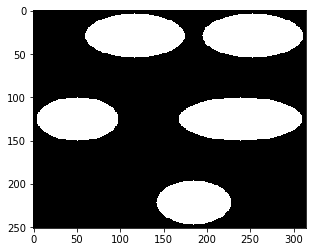

In [22]:
plt.imshow(node_mask, cmap="gray")

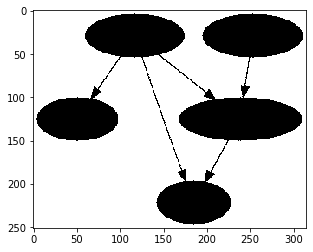

In [23]:
plt.imshow(full_mask, cmap="gray")